In [1]:
import mlflow
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from functools import partial

from pickle import dump

from scripts.Preprocessing import Preprocessing
from scripts.BinaryClassificationTraining import BinaryClassificationTraining

from scripts.config import (year_month_train, 
    input_data_path_train,
    seed)

In [2]:
local_path_save = './local_artifacts_tmp/06_Random_Forest/'
year_month = year_month_train
input_data_path = input_data_path_train

### MLFlow setting

In [3]:
if not os.path.exists(local_path_save):
    os.makedirs(local_path_save)

#save all metadata in a sqlite db. Artifacts will be saved on local folder ./mlflow    
mlflow.set_tracking_uri("sqlite:///mlflow.db")

# Name of the experiment
exp_name = "06 - Random Forest"
# set up MlFlow axperiment
experiment_id = mlflow.set_experiment(exp_name)

### Experiments

In [4]:
run_name = 'base'

In [5]:
random_forest_training = BinaryClassificationTraining(
    input_data_path,
    local_path_save,
    year_month,
    'random_forest')

In [6]:
prepr = Preprocessing(input_data_path_train, task_type='classification')
X, Y = prepr.read_dataframe(request_tgt=True)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=seed)


#preprocessing ohe
shapes_pre = (X_train.shape[0], X_test.shape[0])
X_train_ohe, ohe, scaler = prepr.preprocess_for_classification(df=X_train, fit_ohe=True, perform_scaling=True)
X_test_ohe, _, _ = prepr.preprocess_for_classification(df=X_test, 
                                                    fit_ohe=False, 
                                                    ohe=ohe,
                                                    perform_scaling=True,
                                                    scaler=scaler)
assert shapes_pre == (X_train.shape[0], X_test.shape[0])
dump(ohe, open(local_path_save + run_name + '_ohe.pkl', 'wb'))
dump(scaler, open(local_path_save + run_name + '_scaler.pkl', 'wb'))

/Users/davideposillipo/Documents/Didattica.nosync/DSR_ML_Fundamentals_2023/scripts/Preprocessing.py:161: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['lpep_pickup_datetime_week'] = df['lpep_pickup_datetime'].dt.week
/Users/davideposillipo/Documents/Didattica.nosync/DSR_ML_Fundamentals_2023/scripts/Preprocessing.py:161: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['lpep_pickup_datetime_week'] = df['lpep_pickup_datetime'].dt.week


In [7]:
# Calculating the baseline
random_forest_training.calculate_classification_baseline(Y_train=Y_train, Y_test=Y_test, run_name=run_name)

/Users/davideposillipo/.pyenv/versions/3.10.9/envs/mlops/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davideposillipo/.pyenv/versions/3.10.9/envs/mlops/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'loss': 0.5, 'status': 'ok'}

In [8]:
# TODO complete the experiment using your implementation from BinaryClassificationTraining

In [9]:
np.arange(10,600,100, dtype=int)

array([ 10, 110, 210, 310, 410, 510])

In [10]:
max_evals = 6

# Here we can decide which hyperparameters we want to tune
rf_parameters_search = {
    #'penalty': hp.choice('penalty', ['l1', 'l2', 'elasticnet', None]),
    'n_estimators': hp.choice('x1', np.arange(10,600,100, dtype=int))
}

random_forest_training.set_hyperparameter_space(rf_parameters_search)

In [11]:
for B in np.arange(10,600,100, dtype=int):
    
    max_evals = 1
                   
    # Here we can decide which hyperparameters we want to tune
    rf_parameters_search = {
        'n_estimators': B,
        'max_depth': 10
    }

    random_forest_training.set_hyperparameter_space(rf_parameters_search)
                   
    trials = Trials()

    best_result = fmin(
        fn=partial(random_forest_training.objective_random_forest, 
            X_train=X_train_ohe,
            X_test=X_test_ohe,
            Y_train=Y_train,
            Y_test=Y_test,
            run_name=run_name,
            threshold=0.89),
        space=random_forest_training.hp_space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        rstate=np.random.default_rng(seed)
    )

    best_result

  0%|                                                                                    | 0/1 [00:00<?, ?trial/s, best loss=?]

/Users/davideposillipo/.pyenv/versions/3.10.9/envs/mlops/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



  0%|                                                                                    | 0/1 [00:06<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [ ]:
rg = np.arange(10,100,10, dtype=int)

In [ ]:
run_name = 'base'
rg = np.arange(10,100,10, dtype=int)

for md in rg:
    
    max_evals = 1
                   
    # Here we can decide which hyperparameters we want to tune
    rf_parameters_search = {
        'n_estimators': 210,
        'max_depth': md
    }

    random_forest_training.set_hyperparameter_space(rf_parameters_search)
                   
    trials = Trials()

    best_result = fmin(
        fn=partial(random_forest_training.objective_random_forest, 
            X_train=X_train_ohe,
            X_test=X_test_ohe,
            Y_train=Y_train,
            Y_test=Y_test,
            run_name=run_name,
            threshold=0.89),
        space=random_forest_training.hp_space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        rstate=np.random.default_rng(seed)
    )

    best_result

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier(n_estimators=210, max_depth=30)

In [14]:
rf.fit(X_train_ohe,
            Y_train)

RandomForestClassifier(max_depth=30, n_estimators=210)

In [15]:
Y_pred_train_prob = rf.predict_proba(X_train_ohe)
Y_pred_test_prob = rf.predict_proba(X_test_ohe)

In [16]:
X_train_ohe.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,improvement_surcharge,tolls_amount,lpep_pickup_datetime_week,lpep_pickup_datetime_day,lpep_pickup_datetime_hour,...,PU_DO_97_97,store_and_fwd_flag_N,store_and_fwd_flag_Y,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,trip_type_1.0,trip_type_2.0
20502,-0.284099,0.547784,0.558253,0.730899,0.195794,0.050084,-0.108879,-0.054555,1.251474,0.618498,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39305,-0.284099,-0.025228,-0.042358,0.730899,0.195794,0.050084,-0.108879,-0.261701,-0.488720,0.822487,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32533,-0.284099,-0.333358,-0.342663,-0.600097,0.195794,0.050084,-0.108879,-0.261701,-0.256694,-1.013414,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
58,-0.284099,-1.192877,-0.417739,-0.600097,-5.107421,0.050084,-0.108879,-0.365274,-1.300811,-2.237348,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
22103,-0.284099,-0.468502,-0.342663,-0.600097,0.195794,0.050084,-0.108879,-0.054555,1.251474,-1.013414,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
powers = rf.feature_importances_

In [18]:
dd = {label: importance for label, importance 
 in zip(X_train_ohe.columns, powers)}

In [19]:
dd['trip_distance']

0.14675799255867994

In [20]:
dd['trip_distance'] == dd.get('trip_distance')

True

In [21]:
Y_pred_test_prob

array([[0.93433643, 0.06566357],
       [0.92165421, 0.07834579],
       [0.91177203, 0.08822797],
       ...,
       [0.92219963, 0.07780037],
       [0.89397866, 0.10602134],
       [0.91770289, 0.08229711]])

In [22]:
threshold = 0.5

In [23]:
Y_pred_train = [0 if x>=threshold else 1 for x in Y_pred_train_prob[:, 0]]
Y_pred_test = [0 if x>=threshold else 1 for x in Y_pred_test_prob[:, 0]]

In [24]:
pd.Series(Y_pred_test).value_counts()

0    8324
1      69
dtype: int64

In [25]:
Y_test.value_counts()

0    7496
1     897
Name: tipped, dtype: int64

In [26]:
fi = pd.DataFrame([pd.Series(rf.feature_importances_), pd.Series(rf.feature_names_in_)])

In [27]:
fi_t = fi.T

In [28]:
fi_t

,0,1
0,0.017629,passenger_count
1,0.146758,trip_distance
2,0.103992,fare_amount
3,0.023254,extra
4,0.027362,mta_tax
...,...,...
792,0.000315,RatecodeID_3.0
793,0.000167,RatecodeID_4.0
794,0.015257,RatecodeID_5.0
795,0.017001,trip_type_1.0


In [29]:
fi_t.rename(columns = {0:'importance', 1:'name'}, inplace=True)

In [30]:
fi_t.sort_values('importance', ascending=False)

,importance,name
1,0.146758,trip_distance
2,0.103992,fare_amount
10,0.081053,lpep_pickup_datetime_minute
9,0.072737,lpep_pickup_datetime_hour
8,0.062506,lpep_pickup_datetime_day
...,...,...
307,0.0,PU_DO_260_223
728,0.0,PU_DO_95_131
110,0.0,PU_DO_152_74
209,0.0,PU_DO_226_82


In [31]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=20)

In [46]:
pca.fit(X_train_ohe)

PCA(n_components=20)

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

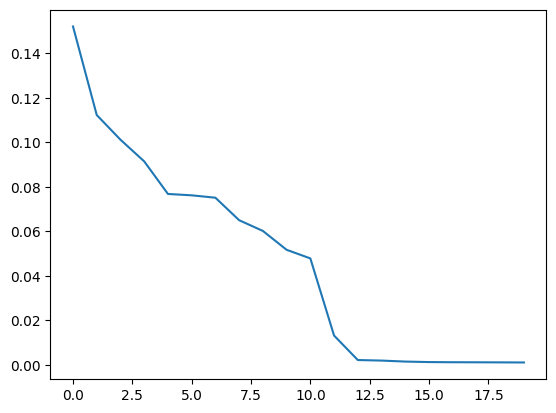

In [48]:
plt.plot(pca.explained_variance_ratio_)

In [49]:
l = 11

In [50]:
pca_2 = PCA(n_components=l)

In [51]:
pca_2.fit(X_train_ohe)

PCA(n_components=11)

In [52]:
Z_train = pca_2.transform(X_train_ohe)

In [76]:
pd.DataFrame(Z_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.681080,-0.869172,0.113771,0.438378,-0.685263,-1.011341,1.217417,-0.120554,-0.310435,0.132603,0.376270
1,-0.076366,-0.750682,-0.227808,0.591851,0.531216,-1.255687,0.192018,-0.211262,0.297994,-0.294681,-0.050237
2,-0.532241,0.550659,-0.032764,-0.721034,-0.662250,1.274095,-1.082320,0.211939,-0.338101,-0.106292,-0.696473
3,-0.438472,3.752857,2.931553,0.431643,0.820118,0.599613,-1.516016,-2.542113,0.975680,1.585853,-1.601448
4,-0.601145,0.131393,0.650274,-0.958344,-1.076085,0.511275,0.028784,0.255950,-0.351520,0.542992,0.208029
...,...,...,...,...,...,...,...,...,...,...,...
19578,-0.049067,-0.408219,1.037910,-1.036932,0.050446,-0.765865,0.065479,-0.049910,-0.104803,0.351678,1.147074
19579,-0.612448,0.477977,-0.206958,-0.729708,0.524011,-0.685109,-0.407997,-0.050820,0.341601,-0.640924,-0.509318
19580,-0.125652,-1.102798,0.075482,0.675576,0.933019,-0.677769,-0.817591,-0.228030,0.293273,-0.148536,0.375437
19581,-0.691718,0.029338,0.689076,-1.612788,2.081403,1.906809,3.393883,0.599114,-0.173061,0.827641,0.105349


In [53]:
Z_test = pca_2.transform(X_test_ohe)

In [54]:
rf_on_pca_components = RandomForestClassifier()

In [55]:
rf_on_pca_components.fit(Z_train, Y_train)

RandomForestClassifier()

In [65]:
y_rf_pca_predictions_test = rf_on_pca_components.predict_proba(Z_test)
y_rf_pca_predictions_train = rf_on_pca_components.predict_proba(Z_train)

In [66]:
from sklearn.metrics import (accuracy_score,
        precision_score,
        recall_score,
        roc_auc_score,
        f1_score)

In [67]:
threshold = 0.5 

Y_pred_train = [0 if x>=threshold else 1 for x in y_rf_pca_predictions_train[:, 0]]
Y_pred_test = [0 if x>=threshold else 1 for x in y_rf_pca_predictions_test[:, 0]]

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

precision_train = precision_score(Y_train, Y_pred_train)
precision_test = precision_score(Y_test, Y_pred_test)

recall_train = recall_score(Y_train, Y_pred_train)
recall_test = recall_score(Y_test, Y_pred_test)

f1_score_train = f1_score(Y_train, Y_pred_train)
f1_score_test = f1_score(Y_test, Y_pred_test)

roc_auc_train = roc_auc_score(Y_train, Y_pred_train_prob[:, 1])
roc_auc_test = roc_auc_score(Y_test, Y_pred_test_prob[:, 1])

results = {'accuracy_train': accuracy_train,
'accuracy_test': accuracy_test,
'precision_train': precision_train,
'precision_test': precision_test,
'recall_train': recall_train,
'recall_test': recall_test,
'roc_auc_train': roc_auc_train,
'roc_auc_test': roc_auc_test,
'f1_score_train': f1_score_train,
'f1_score_test': f1_score_test}

In [68]:
results

{'accuracy_train': 1.0,
 'accuracy_test': 0.8951507208387942,
 'precision_train': 1.0,
 'precision_test': 0.5702479338842975,
 'recall_train': 1.0,
 'recall_test': 0.07692307692307693,
 'roc_auc_train': 0.9408998674915324,
 'roc_auc_test': 0.7341340874181577,
 'f1_score_train': 1.0,
 'f1_score_test': 0.13555992141453832}

In [75]:
rf_on_pca_components.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}